<a href="https://colab.research.google.com/github/Mikkel-AI0700/ML-Network-Intrusion/blob/master/intrusion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the raw CSV dataset
main_pd = pd.read_csv("/content/cybersecurity_intrusion_data.csv")
main_np = main_pd.to_numpy()

In [ ]:
main_pd

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


In [ ]:
main_pd

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


# Exploratory Data Analysis

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

temp_ohe = OneHotEncoder(sparse_output=False)

In [ ]:
# Dropping session_id and browser_type
#main_pd = main_pd.drop(["session_id", "browser_type"], axis=1)
main_np = np.delete(main_np, [0, 8], axis=1)

In [ ]:
copy_pd = main_pd.copy()
copy_np = copy_pd.to_numpy()

X_dataset, y_dataset = copy_pd.iloc[:, :-1], copy_pd.iloc[:, -1]

In [ ]:
X_dataset = pd.concat(
    [
        X_dataset.drop(["protocol_type", "encryption_used", "unusual_time_access"], axis=1),
        pd.DataFrame(temp_ohe.fit_transform(X_dataset[["protocol_type", "encryption_used", "unusual_time_access"]]), columns=temp_ohe.get_feature_names_out())
    ],
    axis=1
)

### Visualizing the relational aspects

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5.5))
ax = ax.flatten()

for col_idx, col in enumerate(["session_duration", "ip_reputation_score"]):
    sns.scatterplot(data=X_dataset, x="network_packet_size", y=col, hue=y_dataset, ax=ax[col_idx])

Error in callback <function flush_figures at 0x78c6baab98a0> (for post_execute):


KeyboardInterrupt: 

### Visualizing the distributional aspect

In [ ]:
X_dataset

,session_id,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,browser_type,protocol_type_ICMP,protocol_type_TCP,protocol_type_UDP,encryption_used_AES,encryption_used_DES,encryption_used_nan,unusual_time_access_0,unusual_time_access_1
0,SID_00001,599,4,492.983263,0.606818,1,Edge,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,SID_00002,472,3,1557.996461,0.301569,0,Firefox,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,SID_00003,629,3,75.044262,0.739164,2,Chrome,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,SID_00004,804,4,601.248835,0.123267,0,Unknown,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,SID_00005,453,5,532.540888,0.054874,1,Firefox,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,3,226.049889,0.517737,3,Chrome,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9533,SID_09534,380,3,182.848475,0.408485,0,Chrome,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9534,SID_09535,664,5,35.170248,0.359200,1,Firefox,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
9535,SID_09536,406,4,86.664703,0.537417,1,Chrome,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


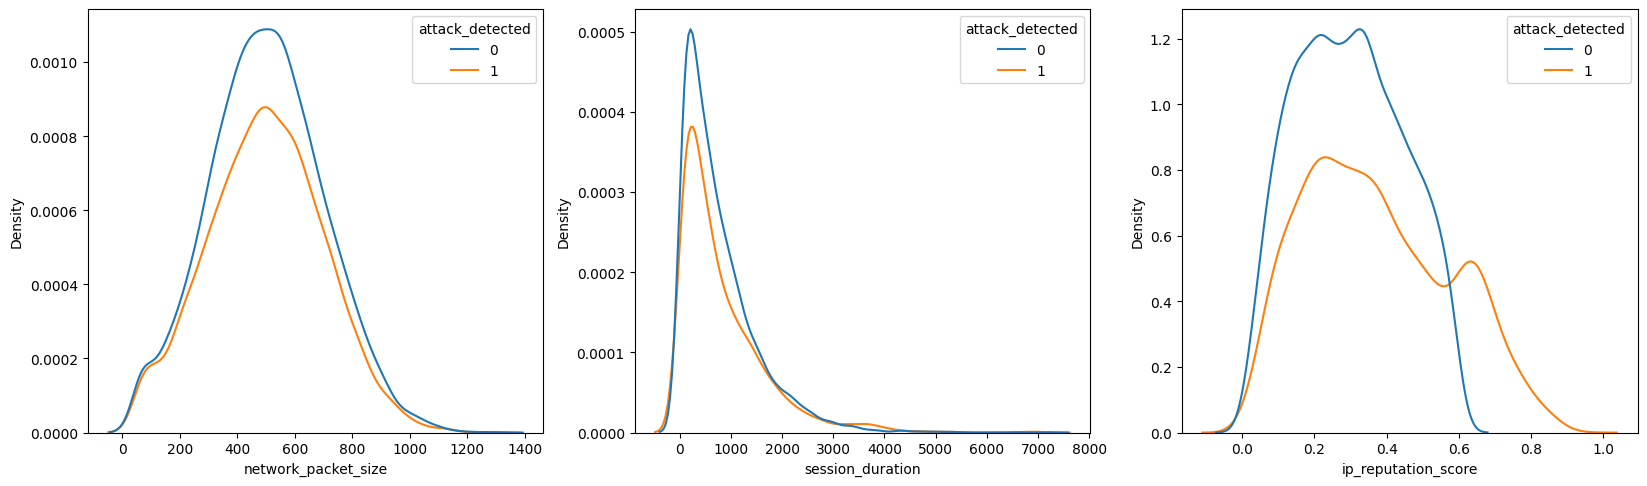

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5.5))
ax = ax.flatten()

for col_idx, col in enumerate(["network_packet_size", "session_duration", "ip_reputation_score"]):
    sns.kdeplot(data=X_dataset, x=col, hue=y_dataset, ax=ax[col_idx])

### Visualizing the categorical aspect

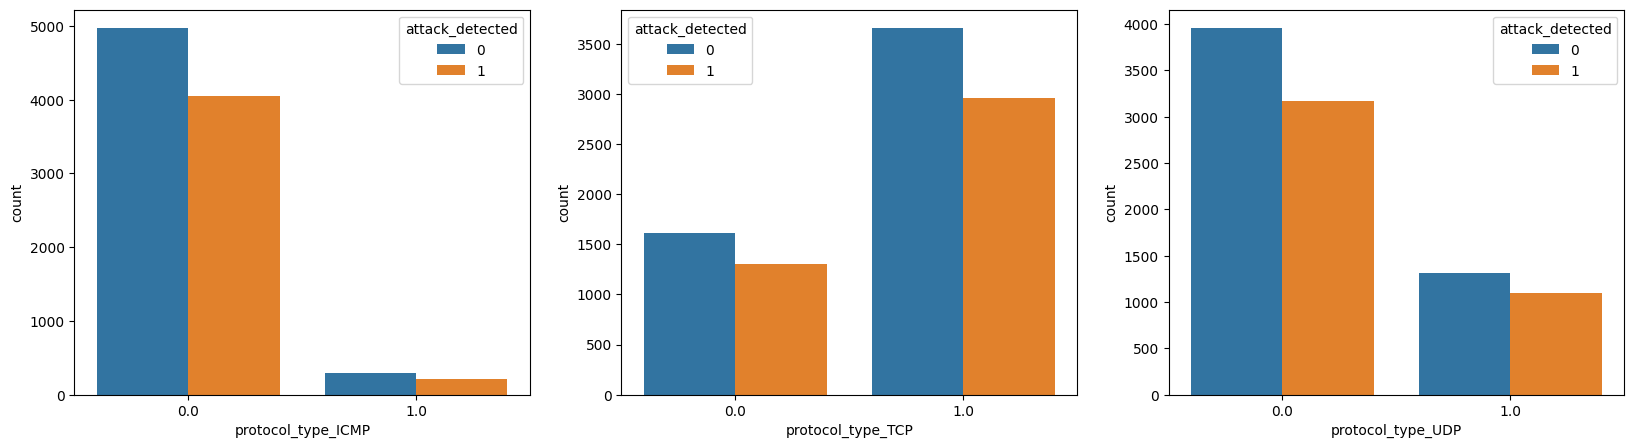

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax = ax.flatten()

for col_idx, col in enumerate(["protocol_type_ICMP", "protocol_type_TCP", "protocol_type_UDP"]):
    sns.countplot(data=X_dataset, x=col, hue=y_dataset, ax=ax[col_idx])

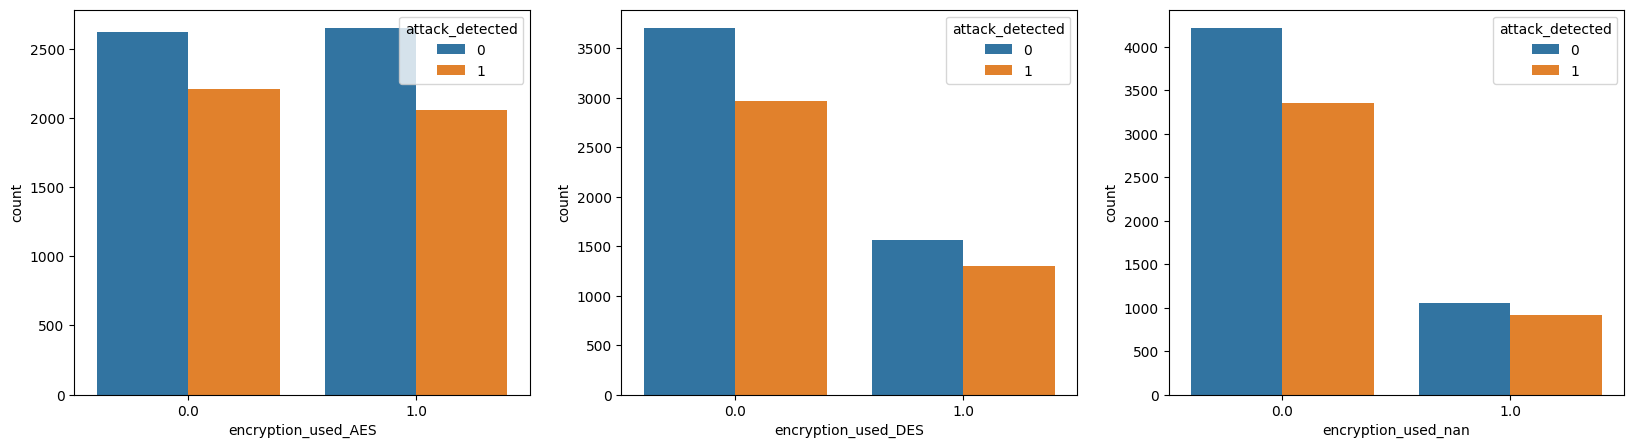

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax = ax.flatten()

for col_idx, col in enumerate(["encryption_used_AES", "encryption_used_DES", "encryption_used_nan"]):
    sns.countplot(data=X_dataset, x=col, hue=y_dataset, ax=ax[col_idx])

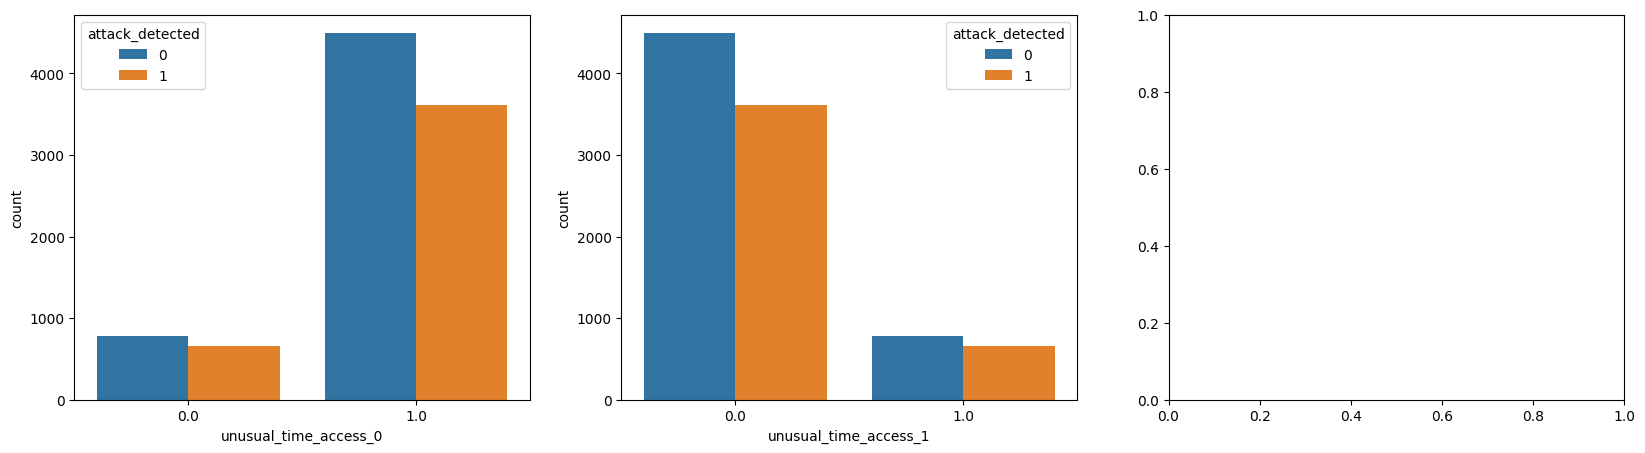

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax = ax.flatten()

for col_idx, col in enumerate(["unusual_time_access_0", "unusual_time_access_1"]):
    sns.countplot(data=X_dataset, x=col, hue=y_dataset, ax=ax[col_idx])

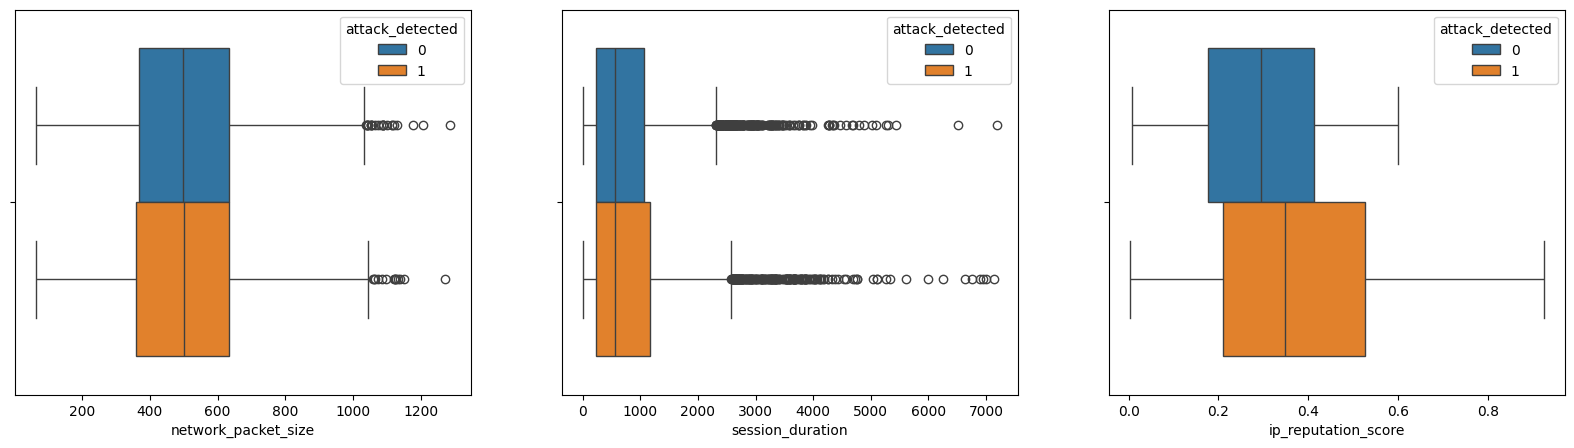

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax = ax.flatten()

for col_idx, col in enumerate(["network_packet_size", "session_duration", "ip_reputation_score"]):
    sns.boxplot(data=X_dataset, x=col, hue=y_dataset, ax=ax[col_idx])

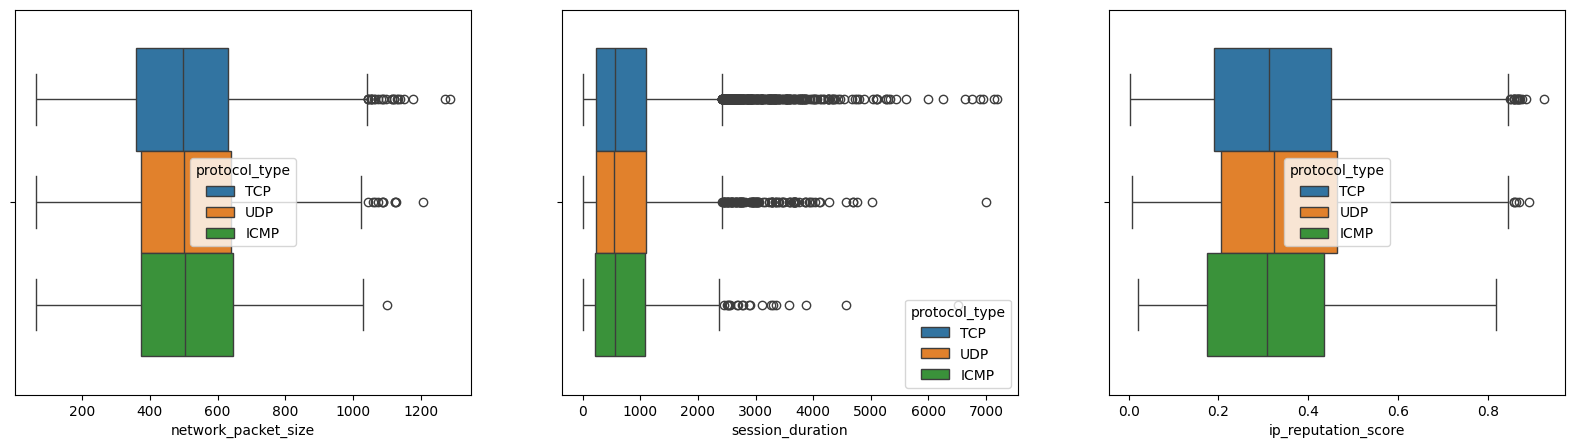

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax = ax.flatten()

for col_idx, col in enumerate(["network_packet_size", "session_duration", "ip_reputation_score"]):
    sns.boxplot(data=X_dataset, x=col, hue=copy_pd["protocol_type"], ax=ax[col_idx])

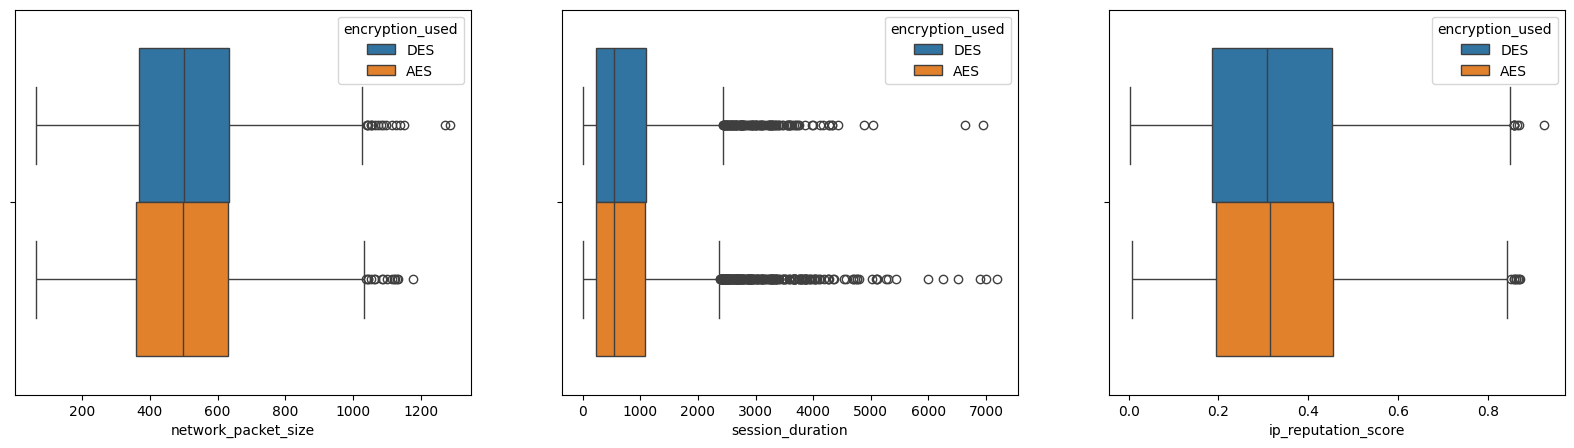

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax = ax.flatten()

for col_idx, col in enumerate(["network_packet_size", "session_duration", "ip_reputation_score"]):
    sns.boxplot(data=X_dataset, x=col, hue=copy_pd["encryption_used"], ax=ax[col_idx])

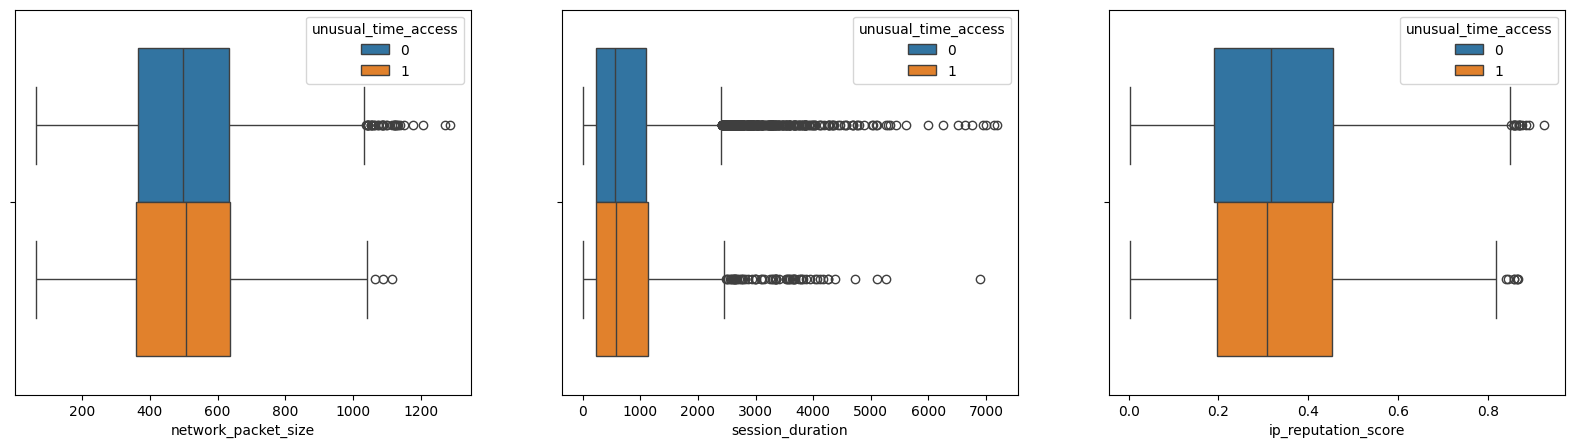

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax = ax.flatten()

for col_idx, col in enumerate(["network_packet_size", "session_duration", "ip_reputation_score"]):
    sns.boxplot(data=X_dataset, x=col, hue=copy_pd["unusual_time_access"], ax=ax[col_idx])

<Axes: xlabel='failed_logins', ylabel='count'>

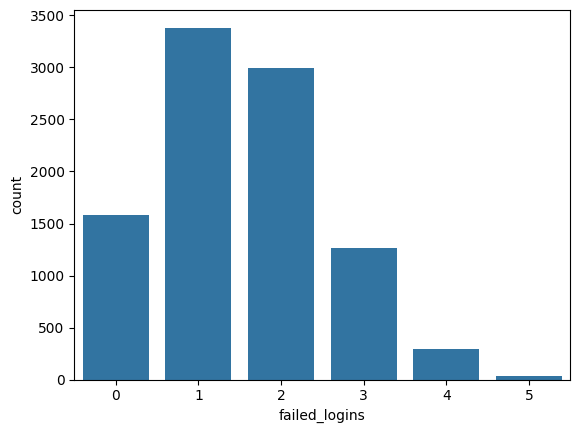

In [ ]:
sns.countplot(data=copy_pd, x="failed_logins")

<Axes: xlabel='login_attempts', ylabel='count'>

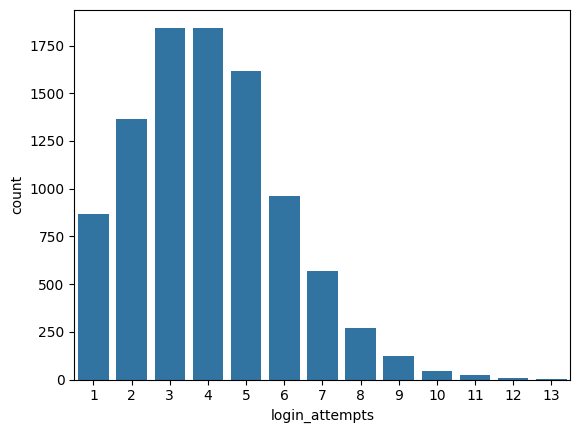

In [ ]:
sns.countplot(data=copy_pd, x="login_attempts")

<Axes: xlabel='attack_detected', ylabel='count'>

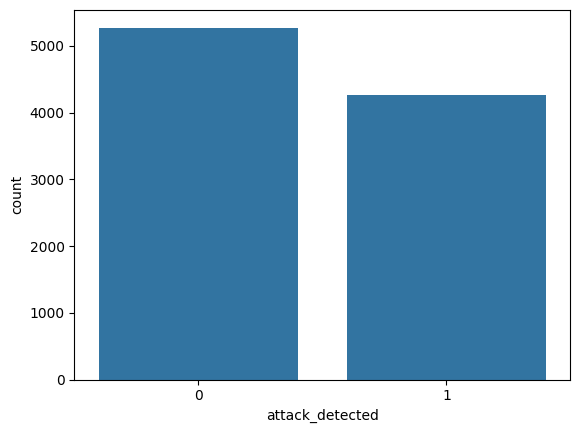

In [ ]:
sns.countplot(data=copy_pd, x="attack_detected")

# Preprocessing the dataset
I'll preprocess the dataset using ColumnTransformers and Pipelines

In [ ]:
!pip install --force-reinstall -v "scikit-learn==1.7.0"

Using pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)
  Obtaining dependency information for scikit-learn==1.7.0 from https://files.pythonhosted.org/packages/c6/38/48b75c3d8d268a3f19837cb8a89155ead6e97c6892bb64837183ea41db2b/scikit_learn-1.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached scikit_learn-1.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (17 kB)
  Link requires a different Python (3.11.13 not in: '>=3.7,<3.11'): https://files.pythonhosted.org/packages/3a/be/650f9c091ef71cb01d735775d554e068752d3ff63d7943b26316dc401749/numpy-1.21.2.zip (from https://pypi.org/simple/numpy/) (requires-python:>=3.7,<3.11)
  Link requires a different Python (3.11.13 not in: '>=3.7,<3.11'): https://files.pythonhosted.org/packages/5f/d6/ad58ded26556eaeaa8c971e08b6466f17c4ac4d786cd3d800e26ce59cc01/numpy-1.21.3.zip (from https://pypi.org/simple/numpy/) (requires-python:>=3.7,<3.11)
  Link requires a different Pyth

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.7.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
main_pd = main_pd.drop_duplicates()
main_pd = main_pd.dropna()
main_pd = main_pd.drop(["session_id", "browser_type"], axis=1)

main_x_dataset, main_y_dataset = main_pd.iloc[:, :-1], main_pd.iloc[:, -1]
main_train_x, main_test_x, main_train_y, main_test_y = train_test_split(main_x_dataset, main_y_dataset, train_size=0.8, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
main_ct = ColumnTransformer(
    [
        ("ct_ohe", OneHotEncoder(sparse_output=False), ["protocol_type", "encryption_used", "unusual_time_access"]),
        ("ct_scaler", StandardScaler(), ["network_packet_size", "session_duration", "ip_reputation_score"])
    ],
    verbose=True,
    remainder="passthrough"
)

In [ ]:
# Preprocessing the y dataset separately from the main ColumnTransformer
lencoder = LabelEncoder()
main_train_y = lencoder.fit_transform(main_train_y)
main_test_y = lencoder.transform(main_test_y)

# Training the machine learning models

In [ ]:
import joblib
from sklearn .tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer

In [ ]:
training_finished_msg = "[+] Best score: {} \n[+] Best params: {}"

strat_kfold = StratifiedKFold(shuffle=True, random_state=42)
scoring_dictionary = {
    "precision": make_scorer(precision_score, average="micro"),
    "recall": make_scorer(recall_score, average="micro"),
    "f1": make_scorer(f1_score, average="micro")
}

# Initializing the parameter grid
lr_param_grid = {
    "lr_model__penalty": ["elasticnet", "l1", "l2"],
    "lr_model__l1_ratio": [0.0, 0.3, 0.5, 0.7, 1.0],
    "lr_model__solver": ["saga"],
    "lr_model__max_iter": [100, 200, 300, 400, 500, 600, 700, 800],
    "lr_model__tol": [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    "lr_model__random_state": [42]
}

svc_param_grid = {
    "svc_model__C": [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
    "svc_model__tol": [1e-2, 1e-3, 1e-4],
    "svc_model__max_iter": [700, 800, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500],
    "svc_model__random_state": [42]
}

dt_param_grid = {
    "dt_model__criterion": ["gini", "entropy"],
    "dt_model__max_depth": [10, 20, 30, 40, 50, 100, 200, 300],
    "dt_model__min_samples_split": [50, 60, 70, 100, 150, 200, 250, 300, 350, 400],
    "dt_model__min_samples_leaf": [100, 200, 300, 350],
    "dt_model__max_features": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    "dt_model__random_state": [42]
}


rf_param_grid = {
    "rf_model__n_estimators": [100, 200, 300, 400, 500],
    "rf_model__criterion": ["gini", "entropy"],
    "rf_model__max_depth": [10, 20, 30, 40, 50, 100, 200, 300],
    "rf_model__min_samples_split": [50, 60, 70, 100, 150, 200, 250, 300],
    "rf_model__min_samples_leaf": [100, 200, 300],
    "rf_model__max_features": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    "rf_model__random_state": [42]
}

In [ ]:
# Creating the machine learning pipelines
lr_pipeline = Pipeline([
    ("main_ct", main_ct),
    ("lr_model", LogisticRegression())
])

svc_pipeline = Pipeline([
    ("main_ct", main_ct),
    ("svc_model", SVC())
])

dt_pipeline = Pipeline([
    ("main_ct", main_ct),
    ("dt_model", DecisionTreeClassifier())
])

rf_pipeline = Pipeline([
    ("main_ct", main_ct),
    ("rf_model", RandomForestClassifier())
])

In [ ]:
# Training the LogisticRegression model
lr_grid_search = GridSearchCV(
    estimator=lr_pipeline,
    param_grid=lr_param_grid,
    scoring=scoring_dictionary,
    cv=strat_kfold,
    refit="f1",
    n_jobs=110,
    pre_dispatch=85,
    error_score="raise",
    verbose=3
)

#lr_grid_search.fit(main_train_x, main_train_y)
#print(training_finished_msg.format(lr_grid_search.best_score_, lr_grid_search.best_params_))

LogisticRegression

[+] Best score: 0.5713715918612896


[+] Best params: {'lr_model__l1_ratio': 0.0, 'lr_model__max_iter': 300, 'lr_model__penalty': 'elasticnet', 'lr_model__random_state': 42, 'lr_model__solver': 'saga', 'lr_model__tol': 0.001}

----------------------------------------------------------------------

LogisticRegression result 2

[+] Best score: 0.7290608684442343


[+] Best params: {'lr_model__l1_ratio': 0.0, 'lr_model__max_iter': 200, 'lr_model__penalty': 'l1', 'lr_model__random_state': 42, 'lr_model__solver': 'saga', 'lr_model__tol': 0.00\1}

----------------------------------------------------------------------

LogisticRegression result 3

[+] Best score: 0.7333239310718851


[+] Best params: {'lr_model__l1_ratio': 0.3, 'lr_model__max_iter': 300, 'lr_model__penalty': 'elasticnet', 'lr_model__random_state': 42, 'lr_model__solver': 'saga', 'lr_model__tol': 0.001}

LogisticRegression new results 1

In [ ]:
# Training the SVC model
svc_grid_search = GridSearchCV(
    estimator=svc_pipeline,
    param_grid=svc_param_grid,
    scoring=scoring_dictionary,
    cv=strat_kfold,
    refit="f1",
    n_jobs=80,
    pre_dispatch=65,
    error_score="raise",
    verbose=3
)

#svc_grid_search.fit(main_train_x, main_train_y)
#print(training_finished_msg.format(svc_grid_search.best_score_, svc_grid_search.best_params_))

SVC model results 1

[+] Best score: 0.8155561096985009

[+] Best params: {'svc_model__C': 5.0, 'svc_model__max_iter': 800, 'svc_model__random_state': 42, 'svc_model__tol': 0.01}

----------------------------------------------------------------------

SVC model results 2

[+] Best score: 0.866416621018006

[+] Best params: {'svc_model__C': 8.0, 'svc_model__max_iter': 2000, 'svc_model__random_state': 42, 'svc_model__tol': 0.01}

----------------------------------------------------------------------

SVC model results 3

[+] Best score: 0.8670770958185827

[+] Best params: {'svc_model__C': 10.0, 'svc_model__max_iter': 3000, 'svc_model__random_state': 42, 'svc_model__tol': 0.01}

In [ ]:
# Training the DecisionTreeClassifier model
dt_grid_search = GridSearchCV(
    estimator=dt_pipeline,
    param_grid=dt_param_grid,
    scoring=scoring_dictionary,
    cv=strat_kfold,
    refit="f1",
    n_jobs=110,
    pre_dispatch=85,
    error_score="raise",
    verbose=3
)

#dt_grid_search.fit(main_train_x, main_train_y)
#print(training_finished_msg.format(dt_grid_search.best_score_, dt_grid_search.best_params_))

DecisionTreeClassifier 1 results

[+] Best score: 0.8736814350303733

[+] Best params: {'dt_model__criterion': 'gini', 'dt_model__max_depth': 10, 'dt_model__max_features': 6, 'dt_model__min_samples_leaf': 100, 'dt_model__min_samples_split': 50, 'dt_model__random_state': 42}

In [ ]:
# Training the RandomForestClassifier model
rf_grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    scoring=scoring_dictionary,
    cv=strat_kfold,
    refit="f1",
    n_jobs=100,
    pre_dispatch=85,
    error_score="raise",
    verbose=3
)

#rf_grid_search.fit(main_train_x, main_train_y)
#print(training_finished_msg.format(rf_grid_search.best_score_, rf_grid_search.best_params_))

# Model evaluation

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay

In [ ]:
# Fitting the test models with the selected hyperparameters
main_lr_parameters = {'l1_ratio': 0.3, 'max_iter': 300, 'penalty': 'elasticnet', 'random_state': 42, 'solver': 'saga', 'tol': 0.001}
main_svc_parameters = {'C': 10.0, 'max_iter': 3000, 'random_state': 42, 'tol': 0.01}
main_dt_parameters = {'criterion': 'gini', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 100, 'min_samples_split': 50, 'random_state': 42}

test_lr_pipeline = Pipeline([
    ("main_ct", main_ct),
    ("lr_model", LogisticRegression(**main_lr_parameters))
])

test_svc_pipeline = Pipeline([
    ("main_ct", main_ct),
    ("svc_model", SVC(**main_svc_parameters))
])

test_dt_pipeline = Pipeline([
    ("main_ct", main_ct),
    ("dt_model", DecisionTreeClassifier(**main_dt_parameters))
])

test_lr_pipeline.fit(main_train_x, main_train_y)
test_svc_pipeline.fit(main_train_x, main_train_y)
test_dt_pipeline.fit(main_train_x, main_train_y)

test_lr_preds = test_lr_pipeline.predict(main_test_x)
test_svc_preds = test_svc_pipeline.predict(main_test_x)
test_dt_preds = test_dt_pipeline.predict(main_test_x)

[ColumnTransformer] ........ (1 of 3) Processing ct_ohe, total=   0.0s
[ColumnTransformer] ..... (2 of 3) Processing ct_scaler, total=   0.0s
[ColumnTransformer] ..... (3 of 3) Processing remainder, total=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[ColumnTransformer] ........ (1 of 3) Processing ct_ohe, total=   0.0s
[ColumnTransformer] ..... (2 of 3) Processing ct_scaler, total=   0.0s
[ColumnTransformer] ..... (3 of 3) Processing remainder, total=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[ColumnTransformer] ........ (1 of 3) Processing ct_ohe, total=   0.0s
[ColumnTransformer] ..... (2 of 3) Processing ct_scaler, total=   0.0s
[ColumnTransformer] ..... (3 of 3) Processing remainder, total=   0.0s


In [ ]:
dt_model_prediction = test_dt_pipeline.predict(main_test_x)
precision_score(main_test_y, dt_model_prediction, average = "micro")

0.8805280528052806

In [ ]:
# Doing final metric checks on the LogisticRegression model
for metric_name, metric_reference in scoring_dictionary.items():
    model_prediction = test_lr_pipeline.predict(main_test_x)
    print(f"{metric_name} => {metric_reference(test_lr_pipeline, main_test_x, main_test_y)}")

precision => 0.7260726072607261
recall => 0.7260726072607261
f1 => 0.7260726072607261


In [ ]:
# Doing the final metric checks on the SVC model
for metric_name, metric_reference in scoring_dictionary.items():
    model_prediction = test_svc_pipeline.predict(main_test_x)
    print(f"{metric_name} => {metric_reference(test_svc_pipeline, main_test_x, main_test_y)}")

precision => 0.8765676567656766
recall => 0.8765676567656766
f1 => 0.8765676567656766


In [ ]:
# Doing the final metric checks on the DecisionTreeClassifier model
for metric_name, metric_reference in scoring_dictionary.items():
    model_prediction = test_dt_pipeline.predict(main_test_x)
    print(f"{metric_name} => {metric_reference(test_dt_pipeline, main_test_x, main_test_y)}")

precision => 0.8805280528052806
recall => 0.8805280528052806
f1 => 0.8805280528052806


In [ ]:
models = {test_lr_pipeline, test_svc_pipeline, test_dt_pipeline}
model_save_names = {"logistic-regression-new.pkl", "svc-new.pkl", "decision-tree-new.pkl"}

for test_model, model_save_name in zip(models, model_save_names):
    joblib.dump(test_model, model_save_name)